# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [18]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [6]:
# TODO: Minimum price of the data
minimum_price = np.amin(prices)

# TODO: Maximum price of the data
maximum_price = np.amax(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **<br>
'RM' - I expect 'MEDV' to increase with the increase in 'RM'. In other words, I expect 'RM' and 'MEDV' to be positively correlated. The more is the average number of rooms in the houses in the neighborhood, the bigger the houses are, and the more expensive they are. I also expect the growth rate of MEDV to slow down as we get to larger houses (houses with large RM).

'LSAT' - I expect 'LSAT' and 'MEDV' to be negatively correlated, since the prestige of the neighborhood would be negatively affected by the high number of "lower class" families living there. So rich people probably wouldn't want to live in such areas and, hence, wouldn't be willing to spend a whole lot of money on houses in such neighborhooods. Also, poor working people wouldn't be able to buy expensive houses. Hence, if their concentration is high, they were able to buy the houses, henc ethe houses were not that expensive. As a result, the higher their concentration is in the neighborhood the more they bring the average price down. So that is another reason for MEDV to get lower as LSTAT gets larger.

'PTRATIO' - I assume that PTRATIO is measured as x students per 1 teacher. Hence, I expect 'PTRATIO' and 'MEDV' to be negatively correlated, because having a higher ratio of students to teachers is a signal that each student is getting less attention from a teacher and, hence, the neighborhood probably has worse schools. So the prestige of a neighborhood with low PTSTAT would be higher than of a neighborhood with a higher PSTAT. Moreover, people who care for better schools are parents with at least one child, so we are now talking about families who would possibly be interested in buying a home in low PTSTAT areas. Families with children would also need bigger houses, and as I have explained above, higher RM would also drive MEDV up.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [7]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [8]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**<br>
It seems that this model is doing a pretty good job. Without calculating the coefficiaent of determination, you can sort of tell that the predicted values are fairly close to the true values. r2 value of 92.3% supports this observation as well, since it means that 92.3% of variance of the dependent variable can be explained by the model that made the predictions. r2 above 90% seems pretty good. However, this conclusion can change if there is another model that can explain 99% of variance, for example. In that case, 92% seems a little low. But without other models to compare to, 92% seems like a very decent result.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [9]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **<br>
Splitting data into training and testing set is very important for making sure your model can generalize well (can perform well on unseeen data). After all, the ultimate goal of training a model on some data is to use it on new data and get reliable predictions. 

If all available data is used for training the model, then it is possible that the model will "memorize" the data and all the noise in it instead of learning the general pattern. It can have very low error values on the training set, but when it finally gets new data, it may not be able to handle it well. We can find ourselved in a situation of over-fitting.

We need to split our data into training and testing sets to be able to test performace of the thrained model on the data it hasn't seen. Performance on test data is often expected to be worse than on the training data, but not by much. If it is much worse, then we have a problem and need to tweak the model.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

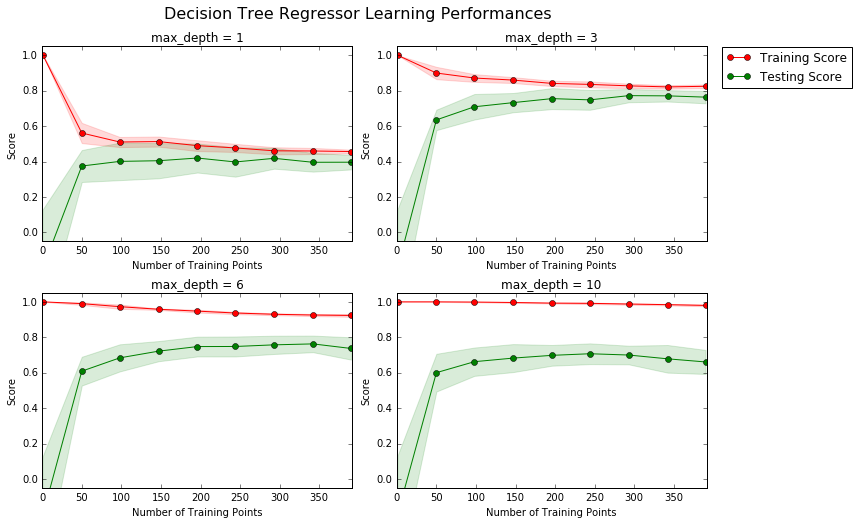

In [10]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: ** <br>
max_depth = 1<br>
As more training points are added, the score for the training curve decreases and the score for the testing curve increases. This is happening because:
- With small number of training examples there is not that much variability in the training data and the model can fairly easyly fit a few data points, which results in high training scores. In this case, testing scrore would suffer, because the chance of the model learning all the true patterns from a small number of training examples is very slim, so when it sees new data, it makes a lot of mistakes.
- As the number of training points increases, the model sees more behaviors and learns to generalize all of them. In this situation the model becomes less accurate on the training data because there are more patterns to explain. But it also becomes more accurate on the test data because it learned more about the true underlying patterns. 

At some point the model will see enough data to learn eveything it can about the underlying patterns. At that point the decrease in training score and increase in testing score will stop. The scores will plateau and won't change much with extra training points. And we can see it in the graph:
 - There was a rapid decrease in training score and just as rapid of an increase in testing score when the training size changed from a few data points to about 50.
 - Then the change in scores slowed down but was still happening until the training size reached about 200. At that point testing score plateaued at about 40% and the training score plateaued at about 47%. The gap between the scores plateaued as well. At this point we know that the model has learned all it could and there is no benefit in throwing more data at the problem.
 
One more thing worth noting is that based on the graph and the plateaued testing and training scores we can coclude that our model doesn't suffer from high variance, i.e. it performs just as well on the training set as it does on the testing set. However, the performace on both sets is not that great with testing and training scores between 40%-50%. This tells us that the model with max_depth = 1 is probably inadequate and that we need to change it or tweak hyper parameters. Indeed, if we look at the graph with max_depth = 3, we can see that the gap between training and testing scores is small, so there is no high variance, and the scores themselves are much higher. They converge at about 80%.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

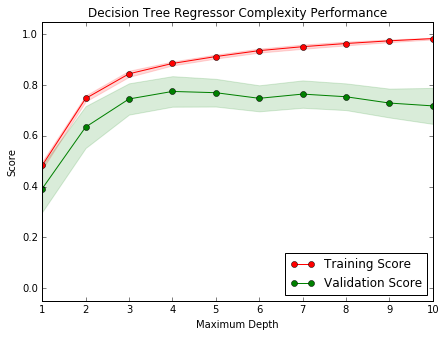

In [11]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **<br>
When trained with max_depth = 1, the model is suffering from high bias. The visual cues are:
 - training and validation scores are close, which suggests that the model is performing just as well on the validation data as it does on the training data, so there is no high variance problem here.
 - training and validation scores are low, which suggests that the model doesn't explain the data very well, hence, it suffers from high bias.
  
When trained with max_depth = 10, the model model suffers from high varaince. The visual cues are:
 - there is a very large gap between training and validation scores, and validation score is much lower than training score. This suggests that the model does very well on training data, but fails to generalize well. So the model overfits. This is the classic description of high variance problem.
 - even though there is a gap, testing score (the lowest of the two) is fairly high still, so there is probably no high bias problem.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **<br>
I think that the model with max_depth = 4 generalizes best to unseen data. I made this conclusion because validation score curve reaches its maximum when model_depth = 4, which means that such a model explains the largest percentage of variation in the dependent variable when previously unseen data is concerned.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **<br>
Grid search is a way to try out various values of model's hyper parameters and determine which combination gives the best results. The idea is if your model has 3 hyper parameters and you wanted to find the best values for, say, the 2 of them, and you wanted to try out 3 values for parameter 1 and 2 values for parameter 2, then you would need to run your model a total of 6 (try all values of parameter 1 with the same value of parameter 2, then do the same thing for a different value of parameter 2) times and choose the model with best performance. Best performance is defined by the chosen score's best value calculated using cross-validation technique.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **<br>
If grid search is applied to all the data available, i.e. model is trained on all the available data multiple times with various combinations of parameter values, chances are that the model will learn not only all the patterns in the data, but it will also memorize all the noise and we will end up choosing the set of values for parameters that explains trainng set very well, but does a poor job on unseen data. We may choose parameters that overfit the data. Like in the max_depth = 10 situation in the Complexity Curve graph above. To avoid this trap, we need to test the performance of our multiple versions of the model on unseen data. A way to do it is to use cross-validation.

K-fold cross validation training technique is a way to train the model while maximizing the amount of data available for training and testing at the same time to achieve the best results. It is done by splitting available data into k equal parts. The model is then trained k times on various combinations of (k-1) parts of original data and tested/validated k times on the remaining k-th part of orignal data that wasn't used in training the model for that specific run. Then the resulting k validation scores are averaged across all the k runs and that is what is used as the final validation score for that model.

The advantage of this technique vs traditional training-testing data split is that all the data can be used for training and validation. We don't need to deal with the trade-off between the size of testing vs training data sets. The disadvantage is that k-fold cross validation is much more complutationally expensive because each model is trained k times instead of 1.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [15]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [16]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **<br>
The maximum depth of the optimal model is 4. It is exactly what I thought would be the best parameter value based on the Complexity Curves in Question 6.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [17]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


**Answer: **<br>
 - Each client's home is priced within min/max price range, so the model doesn't produce any outliers, which is good.
 - Client 1 and Client 2 have houses with comparable number of rooms (RM), but Client 2's neighborhood has higher PTRATIO and LSTAT (since the powerty level is higher). This suggests that Client 2's house should be valued less than Client 1's house, and it does.
 - Client 2's house has the largest number of rooms, the lowest LSTAT and PTRATIO among the three clients. So all 3 factors that influence the price oh a house are influencing the price of Client 3's house in positive direction, so we should expect that house to be much more expensive than the houses of the other two clients. And it is much more expenive.
 
It seems that the model produces reasonable recommendations based on the features selected.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [19]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **<br>
I would say that this model shouldn't be used in a real-world setting, because:
 - The model was trained on data collected in 1978. Even though the prices were adjusted to take inflation into account, many more things happened in the economy since 1978 and taking inflation alone into consideration seems insufficient. We would at least need to collect more time relevant data if we wanted to try and predict current prices on houses.
 - 3 features that were selected for the model, although important features, are definitely not enough to explain all the vaiability in price. Things like age of the house, layout, proximity to various places, cost of upkeeping, seasonality and many more influence people's decisions regarding how much to spend on a home.
 - As was shown above, the model is also not robust, it is not making consistent predictions regarding the price. This could definitely be an issue when you price identical homes differently.
 - Model trained on urban data will not be applicable to any rural areas, because the market conditions are drastically different. I would also say that such a model would not necessarily apply to other cities too. For instanse, New York will have a very different price-square footage relationship than any other city in the US.
 
These are just a few considerations regarding the limitations of this model. If it was trained on more current data and included more features, I think it could be useful to get a general idea of what a house might cost.